# 深度学习系列第六篇 — 卷基层和池化层展示

In [17]:
# -*- coding:utf-8 -*-
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# 下载或加载数据
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)


def weight_variable(shape):
    inital = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(inital)


def bias_variable(shape):
    inital = tf.constant(0.1, shape=shape)
    return tf.Variable(inital)


def conv2d(x, w):
    return tf.nn.conv2d(x, w, strides=[1, 1, 1, 1], padding='SAME')


def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')


xs = tf.placeholder(tf.float32, [None, 784])  # 28 * 28
ys = tf.placeholder(tf.float32, [None, 10])
x_image = tf.reshape(xs, [-1, 28, 28, 1])
# conv1 layer #
w_conv1 = weight_variable([5, 5, 1, 32])  # patch 5 x 5, in size 1, out size 32
b_conv1 = bias_variable([32])
h_conv1 = tf.nn.relu(conv2d(x_image, w_conv1) + b_conv1)  # output size 28 x 28 x 32
h_pool1 = max_pool_2x2(h_conv1)  # output size 14 x 14 x 32

# conv2 layer #
w_conv2 = weight_variable([5, 5, 32, 64])  # patch 5 x 5, in size 32, out size 64
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, w_conv2) + b_conv2)  # output size 14 x 14 x 64
h_pool2 = max_pool_2x2(h_conv2)  # output size 7 x 7 x 64

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Show input:
input shape: (28, 28)


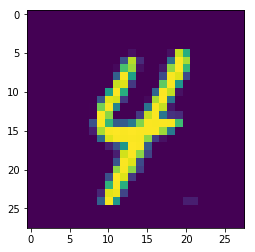

Show first conv2d result:
conv2d shape: (1, 28, 28, 32)


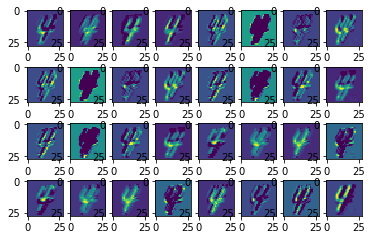

Show first max_pool result:
max_pool shape: (1, 14, 14, 32)


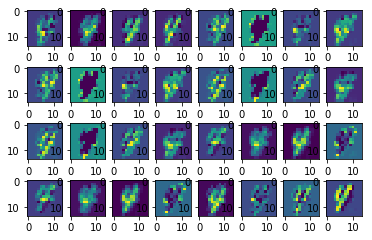

Show second conv2d result:
conv2 shape: (1, 14, 14, 64)


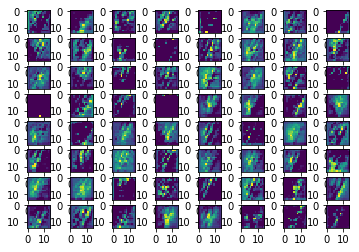

Show second max_pool result:
max_pool shape: (1, 7, 7, 64)


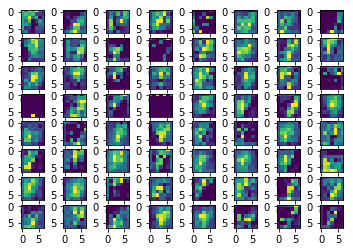

In [19]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    batch_xs, batch_ys = mnist.train.next_batch(1)

    h_conv1_res, h_pool1_res, h_conv2_res, h_pool2_res = \
        sess.run([h_conv1, h_pool1, h_conv2, h_pool2],
                 feed_dict={xs: batch_xs, ys: batch_ys})
    
    input_x = batch_xs.reshape([28, 28])
    print "Show input:"
    print "input shape:", input_x.shape
    gs1 = gridspec.GridSpec(1, 1)
    plt.imshow(input_x)
    plt.show()

    print "Show first conv2d result:"
    print "conv2d shape:", h_conv1_res.shape
    gs1 = gridspec.GridSpec(4, 8)
    for x in range(4):
        for y in range(8):
            plt.subplot(gs1[x, y])
            plt.imshow(h_conv1_res[0, :, :, x * 4 + y])
    plt.show()

    print "Show first max_pool result:"
    print "max_pool shape:", h_pool1_res.shape
    gs1 = gridspec.GridSpec(4, 8)
    for x in range(4):
        for y in range(8):
            plt.subplot(gs1[x, y])
            plt.imshow(h_pool1_res[0, :, :, x * 4 + y])
    plt.show()

    print "Show second conv2d result:"
    print "conv2 shape:", h_conv2_res.shape
    gs1 = gridspec.GridSpec(8, 8)
    for x in range(8):
        for y in range(8):
            plt.subplot(gs1[x, y])
            plt.imshow(h_conv2_res[0, :, :, x * 8 + y])
    plt.show()

    print "Show second max_pool result:"
    print "max_pool shape:", h_pool2_res.shape
    gs1 = gridspec.GridSpec(8, 8)
    for x in range(8):
        for y in range(8):
            plt.subplot(gs1[x, y])
            plt.imshow(h_pool2_res[0, :, :, x * 8 + y])
    plt.show()

卷积层部分被称之为过滤器（或者内核）

单位节点矩阵指长和宽都为1，深度不限的节点矩阵。

过滤器处理的矩阵深度和当前层神经网络节点矩阵的深度一致。

过滤器的处理方式如下图：

![convolution_schematic](img/convolution_schematic.gif)

卷基层的参数个数 = 过滤器尺寸 × 输入矩阵深度 × 卷基层深度 + 卷基层深度（偏置个数）

池化层处理可以非常有效的缩小矩阵的尺寸，同时可以防止过拟合的问题。池化层的计算通常有两种方式，一种是最大池化层，另一种是取平均值的平均池化层。

池化层处理方式：

![pooling_schematic](img/pooling_schematic.gif)

参考资料：

http://mourafiq.com/2016/08/10/playing-with-convolutions-in-tensorflow.html